In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import time 
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import re
# Natural Language Tool Kit 
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
cf.go_offline()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
missing = train.isnull().sum()  
missing

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [14]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [0]:
train['length'] = train['text'].apply(len)

In [16]:
train.keyword.nunique()  # Total of 221 unique keywords

221

In [17]:
train.keyword.value_counts()[:20]

fatalities     45
deluge         42
armageddon     42
harm           41
damage         41
sinking        41
body%20bags    41
evacuate       40
siren          40
windstorm      40
collided       40
outbreak       40
fear           40
twister        40
collision      39
earthquake     39
whirlwind      39
wreckage       39
derailment     39
hellfire       39
Name: keyword, dtype: int64

In [18]:
train.location.value_counts()[:20]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
Everywhere          15
California, USA     15
New York, NY        15
Florida             14
Name: location, dtype: int64

## WordCloud

In [0]:
STOPWORDS.add('https')

def Plot_world (text):
  comment_words = ' '
  stopwords = set(STOPWORDS)

  for val in text:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    for word in tokens:
      comment_words = comment_words + word + ' '

  wordcloud = WordCloud(width = 5000, height = 4000, background_color = 'black',
                        stopwords = stopwords, min_font_size = 10).generate(comment_words)
  
  plt.figure(figsize=(12,12), facecolor = 'k', edgecolor = 'k')
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad = 0)

  plt.show()
                    

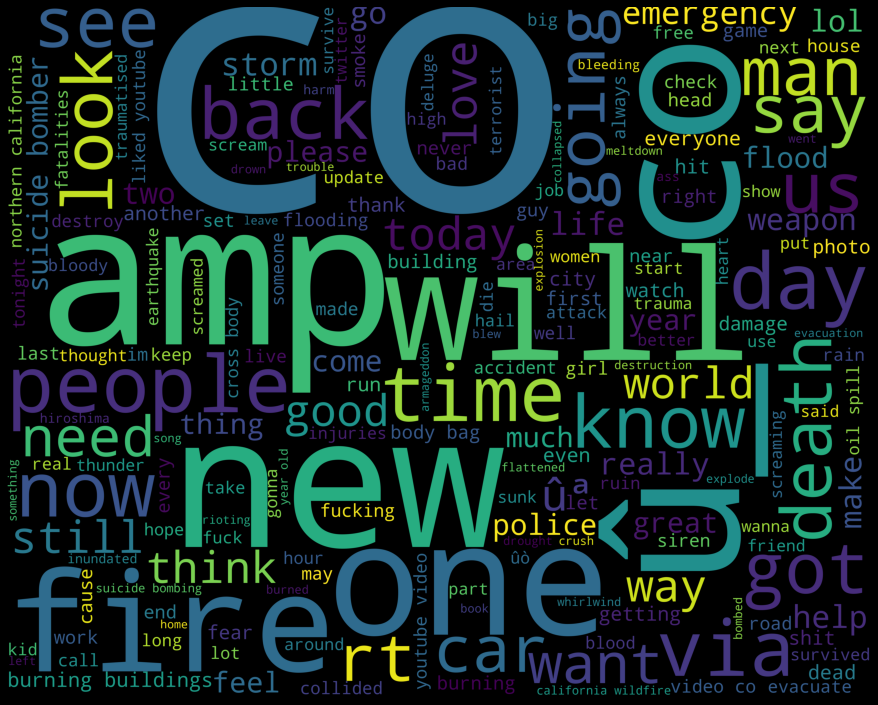

In [21]:
text = train.text.values
Plot_world(text)

# Cleaning the text

In [23]:
train.loc[train['text'].str.contains('http')].target.value_counts()

1    2172
0    1799
Name: target, dtype: int64

In [0]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
def remove_html(text):
  no_html = pattern.sub('', text)
  return no_html

In [0]:
train['text'] = train['text'].apply(lambda x: remove_html(x))

In [26]:
train.loc[train['text'].str.contains('http')].target.value_counts()

0    1
Name: target, dtype: int64

In [0]:
test['text']=test['text'].apply(lambda x : remove_html(x))


**Now remove stopwords, pass to lower add delimiter and more**

In [0]:
def clean_text(text):
  text = re.sub('[^a-zA-Z]', ' ', text)

  text = text.lower()
  text = text.split()

  text = [w for w in text if not w in set(stopwords.words('english'))]

  text = ' '.join(text)

  return text

In [30]:
text = train.text[3]
print(text)
clean_text(text)

13,000 people receive #wildfires evacuation orders in California 


'people receive wildfires evacuation orders california'

In [0]:
train['text'] = train['text'].apply(lambda x : clean_text(x))

In [0]:
test['text'] = test['text'].apply(lambda x : clean_text(x))

In [0]:
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [0]:
text_values = train["text"]

counter = counter_word(text_values)

In [35]:
print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:10]

The len of unique words is: 16070


[('deeds', 2),
 ('reason', 20),
 ('earthquake', 50),
 ('may', 89),
 ('allah', 9),
 ('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56)]

# Train Test Split

In [0]:
# The maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint
max_length = 20
trunc_type = 'post'
padding_type = 'post'

# oov_tok irs ser for words out our word index
oov_tok = '<XXX>'
training_size = 6090
seq_len = 12

In [0]:
# this is base in 80% of the data, an only text and targert at this moment

training_sentences = train.text[0:training_size]
training_labels = train.target[0:training_size]

testing_sentences = train.text[training_size:]
testing_labels = train.target[training_size:]

In [39]:
print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',testing_sentences.shape)

The Shape of training  (6090,)
The Shape of testing (1523,)


In [46]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Lets see the first 10 elements
print("THe first word Index are: ")
for x in list(word_index)[0:15]:
    print (" {},  {} ".format(x,  word_index[x]))



THe first word Index are: 
 <XXX>,  1 
 amp,  2 
 like,  3 
 fire,  4 
 get,  5 
 via,  6 
 new,  7 
 people,  8 
 news,  9 
 emergency,  10 
 one,  11 
 disaster,  12 
 body,  13 
 video,  14 
 burning,  15 


In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [54]:
print(train.text[1])
print(training_sequences[1])
print(training_padded.shape)
len(training_sequences)

forest fire near la ronge sask canada
[74, 4, 120, 571, 5480, 5481, 1184]
(6090, 20)


6090

**Check reverse to see how it works**

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [44]:
# Lets see the first 10 elements
print("THe first reverse word Index are: ")
for x in list(reverse_word_index)[0:15]:
    print (" {},  {} ".format(x,  reverse_word_index[x]))

# If you want to see completed -> reverse_word_index

THe first reverse word Index are: 
 1,  <XXX> 
 2,  amp 
 3,  like 
 4,  fire 
 5,  get 
 6,  via 
 7,  new 
 8,  people 
 9,  news 
 10,  emergency 
 11,  one 
 12,  disaster 
 13,  body 
 14,  video 
 15,  burning 


In [0]:
def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [56]:
decode(training_sequences[1]) # this can be usefull for check predictions

'forest fire near la ronge sask canada'

In [57]:
training_padded[1628]

array([7779, 1150, 2107,  629, 2106, 1257,   52,  326, 2106, 1257,   52,
        326, 7780,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



# Creating the Model

In [0]:
# Model Definition with LSTM

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(14, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid') #binary classification
                             ])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            514240    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 14)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 565,725
Trainable params: 565,725
Non-trainable params: 0
_________________________________________________________________


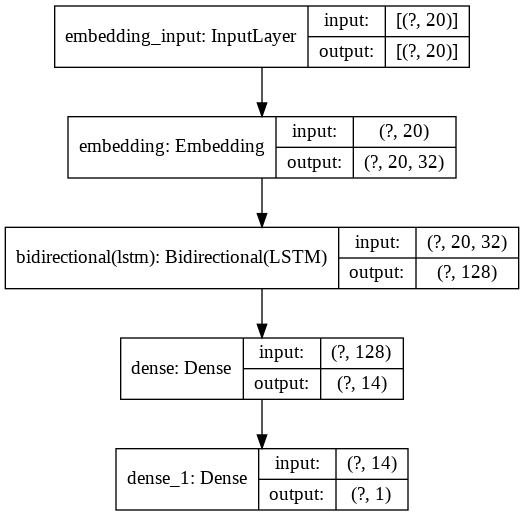

In [63]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [66]:
start_time = time.time()
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded,testing_labels))
final_time = (time.time() - start_time)/60
print(f'The time in minutes: {final_time}')

Epoch 1/10
191/191 [==============================] - 5s 29ms/step - loss: 0.3277 - accuracy: 0.8652 - val_loss: 0.5364 - val_accuracy: 0.7098
Epoch 2/10
191/191 [==============================] - 5s 25ms/step - loss: 0.1834 - accuracy: 0.9345 - val_loss: 0.6095 - val_accuracy: 0.6927
Epoch 3/10
191/191 [==============================] - 5s 25ms/step - loss: 0.1237 - accuracy: 0.9603 - val_loss: 0.9107 - val_accuracy: 0.6835
Epoch 4/10
191/191 [==============================] - 5s 25ms/step - loss: 0.0974 - accuracy: 0.9718 - val_loss: 0.8054 - val_accuracy: 0.7118
Epoch 5/10
191/191 [==============================] - 5s 26ms/step - loss: 0.0840 - accuracy: 0.9709 - val_loss: 0.9362 - val_accuracy: 0.7078
Epoch 6/10
191/191 [==============================] - 5s 26ms/step - loss: 0.0686 - accuracy: 0.9770 - val_loss: 0.9630 - val_accuracy: 0.6645
Epoch 7/10
191/191 [==============================] - 5s 25ms/step - loss: 0.0591 - accuracy: 0.9772 - val_loss: 1.0267 - val_accuracy: 0.6894

In [67]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.327718,0.865189,0.536368,0.709783
1,0.183353,0.934483,0.609493,0.692712
2,0.123740,0.960263,0.910692,0.683519
3,0.097366,0.971757,0.805420,0.711753
4,0.083975,0.970936,0.936205,0.707814


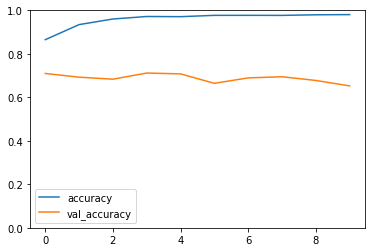

In [68]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1]);

# Model Evaluation

In [69]:
predictions = model.predict_classes(testing_padded)   # predict_ clases because is classification problem with the split test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [70]:
predictions

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

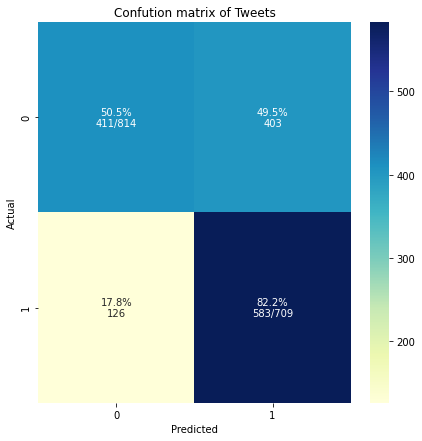

In [73]:
# Showing Confusion Matrix
plot_cm(testing_labels,predictions, 'Confution matrix of Tweets', figsize=(7,7))

# Now working with test dataset

In [0]:
testing_sequences2 = tokenizer.texts_to_sequences(test.text)
testing_padded2 = pad_sequences(testing_sequences2, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
predictions = model.predict(testing_padded2)

In [76]:
# sample of submission
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [0]:
submission['target'] = (predictions > 0.5).astype(int)

In [79]:
submission

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
